# **Analyzing a UK Bank Campaign for Fixed-Term Saving Accounts**
## **Introduction**
This report focuses on analyzing and predicting customer responses to a UK bank’s fixed term saving account campaign. The dataset used in the analysis has been preprocessed to explore various aspects of customer demographics, engagement behaviors, and campaign effectiveness. The primary aim was to gain actionable insights and build predictive models that could optimize future campaign strategies.

In order to achieve the objective, data preprocessing and exploratory data analysis (EDA) was conducted. This was followed by development of classification models such as Logistic Regression, Decision Trees, and K-Nearest Neighbors (KNN). Results of these models and evaluations of their predictive performance based on appropriate metrics and visualizations have been discussed in this report. I have also added definitions of ‘predictive performance’ to support individuals unaware of terminology within the report. The findings of the report can be used to inform strategic decision making and enhance the effectiveness of future marketing efforts. 


The analysis is based on two datasets:

1. **Campaign Information Dataset (`all_campaign.csv`)**: This dataset includes information about the bank's efforts to contact customers and the responses to the campaign.

2. **Personal Characteristics Dataset (`all_personal.csv`)**: This dataset contains demographic and financial information about the customers.

### **Objectives**
The primary goal is to assess the campaign's effectiveness and predict customer responses using machine learning techniques. The analysis is structured into two key tasks:

#### 1. Data Pre-processing and Exploratory Data Analysis (EDA)
- **Data Pre-processing**: This involves ensuring the data is clean and ready for analysis. Tasks include:
  - Handling missing or inconsistent values.
  - Merging the two datasets using the `custID` column as the common key.
  - Transforming or encoding categorical variables if necessary.
- **EDA**: Analyze the data to gain insights into:
  - Customer demographics and financial attributes.
  - Campaign performance, such as response rates across different segments.

#### 2. Building Response Models
Using the pre-processed dataset, develop and compare three classification models to predict whether a customer will respond positively to the campaign:
- **Logistic Regression**: A linear model that predicts probabilities based on independent variables.
- **Decision Tree**: A non-linear model that splits the dataset into segments based on feature importance.
- **k-Nearest Neighbors (kNN)**: A distance-based method that predicts the response based on the closest data points.
  
The effectiveness of these models will be evaluated using:
- Metrics such as accuracy, precision, recall, and F1-score.
- The **ROC curve** (Receiver Operating Characteristic curve) to compare the models' ability to distinguish between positive and negative responses.



## **Data Preprocessing**

This code initializes the necessary tools for data processing, visualization, and machine learning. Libraries like Pandas help manage and manipulate data, while Matplotlib and Seaborn provide visual insights into trends and distributions. Scikit-Learn enables data splitting, preprocessing, model creation, and performance evaluation, making it the backbone for predictive analysis and campaign evaluation in the project.

In [75]:
# Importing necessary libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.tree import export_text, plot_tree

#### **Loading and Exploring Datasets**

This code loads the two datasets, `all_campaign.csv` and `all_personal.csv`, into Pandas DataFrames and displays their first few rows. This step provides an initial overview of the data structure, including column names and sample values, enabling a quick understanding of the information available in each dataset. It serves as a foundation for identifying potential issues like missing values or mismatched formats for further processing.

In [76]:
# Load the datasets
campaign_data = pd.read_csv("all_campaign.csv")
personal_data = pd.read_csv("all_personal.csv")

In [77]:
# Display the first few rows of each dataset
print("\nFirst 5 rows of Campaign Data:")
campaign_data.head()


First 5 rows of Campaign Data:


,custID,contact,duration,response
0,C00002,unknown,151,no
1,C00004,unknown,92,no
2,C00005,unknown,198,no
3,C00006,unknown,139,no
4,C00007,unknown,217,no


In [78]:
print("\nFirst 5 rows of Personal Data:")
personal_data.head()


First 5 rows of Personal Data:


,custID,age,region,job,marital,education,default,balance,housing,loan
0,C00002,44,London,technician,single,secondary,no,34,yes,no
1,C00004,47,London,others,married,NaN,no,1751,yes,no
2,C00005,33,South East,others,single,NaN,no,1,no,no
3,C00006,35,London,management,married,tertiary,no,269,yes,no
4,C00007,28,Yorkshire and the Humber,management,single,tertiary,no,520,yes,yes


#### **Inspecting Dataset Structure**

This code inspects the structure of the datasets by displaying information about each column, including data types, non-null counts, and memory usage. It helps identify issues such as missing values or incorrect data types that may need correction during preprocessing. This step is critical for understanding the data's quality and preparing it for analysis.

In [79]:
# Inspect the datasets
print("Campaign Data:")
campaign_data.info()

Campaign Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33909 entries, 0 to 33908
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   custID    33909 non-null  object
 1   contact   33909 non-null  object
 2   duration  33909 non-null  int64 
 3   response  33909 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [80]:

print("\nPersonal Data:")
personal_data.info()


Personal Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33909 entries, 0 to 33908
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   custID     33909 non-null  object
 1   age        33909 non-null  int64 
 2   region     33909 non-null  object
 3   job        33909 non-null  object
 4   marital    33909 non-null  object
 5   education  32518 non-null  object
 6   default    33909 non-null  object
 7   balance    33909 non-null  int64 
 8   housing    33909 non-null  object
 9   loan       33909 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.6+ MB


#### **Checking and handling for Missing Values**

This code identifies missing values in both datasets. The output shows that the `education` column in the `personal_data` dataset has 1,391 missing values, while all other columns in both datasets are complete. This insight highlights the need to handle the missing `education` values through techniques like imputation or removal during data preprocessing to ensure the dataset is suitable for analysis and modeling.

In [81]:
# Check for missing values in each dataset
print("\nMissing values in Campaign Data:")
print(campaign_data.isnull().sum())

print("\nMissing values in Personal Data:")
print(personal_data.isnull().sum())


Missing values in Campaign Data:
custID      0
contact     0
duration    0
response    0
dtype: int64

Missing values in Personal Data:
custID          0
age             0
region          0
job             0
marital         0
education    1391
default         0
balance         0
housing         0
loan            0
dtype: int64


This code addresses the missing values in the `education` column of the `personal_data` dataset by filling them with the label `'unknown'`. This approach preserves all rows of the dataset while ensuring consistency in the `education` column, which is essential for maintaining data integrity during analysis and modeling.

In [82]:
# Handle missing values
# For the 'education' column in personal_data, fill missing values with 'unknown'
personal_data['education'] = personal_data['education'].fillna('unknown')

#### **Checking for Duplicate Rows**

This code checks for duplicate rows in both datasets to ensure data quality. The output shows that neither the `campaign_data` nor the `personal_data` contains duplicate rows. This indicates that no further action is needed to address redundancy, allowing the analysis to proceed smoothly.

In [83]:
# Check for duplicates in each dataset
print("\nDuplicate rows in Campaign Data:", campaign_data.duplicated().sum())
print("Duplicate rows in Personal Data:", personal_data.duplicated().sum())


Duplicate rows in Campaign Data: 0


Duplicate rows in Personal Data: 0


#### **Merging Datasets**

This code merges the `campaign_data` and `personal_data` datasets on the common column `custID` using an inner join. The result combines campaign information with personal characteristics for customers available in both datasets. The merged dataset provides a unified view of the data, enabling deeper analysis of customer responses and characteristics.

In [84]:
# Merge the datasets on the 'custID' column
merged_data = pd.merge(campaign_data, personal_data, on='custID', how='inner')

In [85]:
print("\nMerged Data:")
merged_data.info()


Merged Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33909 entries, 0 to 33908
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   custID     33909 non-null  object
 1   contact    33909 non-null  object
 2   duration   33909 non-null  int64 
 3   response   33909 non-null  object
 4   age        33909 non-null  int64 
 5   region     33909 non-null  object
 6   job        33909 non-null  object
 7   marital    33909 non-null  object
 8   education  33909 non-null  object
 9   default    33909 non-null  object
 10  balance    33909 non-null  int64 
 11  housing    33909 non-null  object
 12  loan       33909 non-null  object
dtypes: int64(3), object(10)
memory usage: 3.4+ MB


In [86]:
print("\nFirst 5 rows of Merged Data:")
merged_data.head()


First 5 rows of Merged Data:


,custID,contact,duration,response,age,region,job,marital,education,default,balance,housing,loan
0,C00002,unknown,151,no,44,London,technician,single,secondary,no,34,yes,no
1,C00004,unknown,92,no,47,London,others,married,unknown,no,1751,yes,no
2,C00005,unknown,198,no,33,South East,others,single,unknown,no,1,no,no
3,C00006,unknown,139,no,35,London,management,married,tertiary,no,269,yes,no
4,C00007,unknown,217,no,28,Yorkshire and the Humber,management,single,tertiary,no,520,yes,yes


## **Exploratory Data Analysis (EDA)**

#### **Summary Statistics of Merged Data**

The summary statistics provide an overview of the merged dataset, including counts, unique values, frequencies, and basic statistical measures like mean, standard deviation, and range for numeric columns. Key observations include a wide range of `duration` values (from 0 to 4918 seconds), customer ages spanning 18 to 95 years, and a high concentration of `response` values as "no." This summary highlights variations in customer characteristics and campaign interactions, offering insights for deeper analysis.

In [87]:
print("\nSummary Statistics:")
merged_data.describe(include='all')


Summary Statistics:


,custID,contact,duration,response,age,region,job,marital,education,default,balance,housing,loan
count,33909,33909,33909.000000,33909,33909.000000,33909,33909,33909,33909,33909,33909.000000,33909,33909
unique,33909,3,NaN,2,NaN,10,11,3,4,2,NaN,2,2
top,C00002,virtual assistant,NaN,no,NaN,South East,others,married,secondary,no,NaN,yes,no
freq,1,22044,NaN,29942,NaN,9092,7520,20464,17431,33313,NaN,18911,28458
mean,NaN,NaN,257.605356,NaN,40.970362,NaN,NaN,NaN,NaN,NaN,1569.568286,NaN,NaN
std,NaN,NaN,256.434874,NaN,10.628341,NaN,NaN,NaN,NaN,NaN,3420.725486,NaN,NaN
min,NaN,NaN,0.000000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,-7962.000000,NaN,NaN
25%,NaN,NaN,103.000000,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,83.000000,NaN,NaN
50%,NaN,NaN,180.000000,NaN,39.000000,NaN,NaN,NaN,NaN,NaN,520.000000,NaN,NaN
75%,NaN,NaN,318.000000,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,1655.000000,NaN,NaN


#### **Analyzing Campaign Performance**

This code calculates and visualizes the response rates to the bank's campaign. The output shows that 88.3% of customers did not respond positively, while 11.7% responded affirmatively. The bar plot visualizes the distribution of these responses, with a dominant "no" response, which indicates the need for further investigation into factors that could improve customer engagement.

In [88]:
# Analyze campaign performance (response rates)
response_counts = merged_data['response'].value_counts()
response_rates = merged_data['response'].value_counts(normalize=True) * 100

print("\nResponse Counts:")
print(response_counts)
print("\nResponse Rates (%):")
response_rates


Response Counts:
response
no     29942
yes     3967
Name: count, dtype: int64

Response Rates (%):


response
no     88.301041
yes    11.698959
Name: proportion, dtype: float64

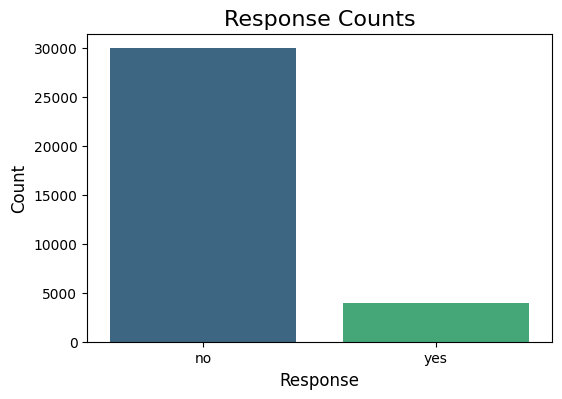

In [89]:
# Visualize the response rates
plt.figure(figsize=(6, 4))
sns.barplot(x=response_counts.index, y=response_counts.values, hue=response_counts.index, dodge=False, palette='viridis', legend=False)
plt.title("Response Counts", fontsize=16)
plt.xlabel("Response", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


The campaign data shows an imbalance in response rates, with 88.3% of customers responding negatively and only 11.7% responding positively. This imbalance suggests that the dataset is skewed, which could affect the performance of machine learning models. In imbalanced datasets, models tend to be biased toward the majority class (in this case, "no" responses), potentially leading to poor predictive performance for the minority class ("yes"). Addressing this imbalance through techniques like resampling or using weighted algorithms is essential for building effective models.

#### **Response Rates by Age Group**

This analysis groups customers into age categories and calculates the response rates within each group. The results show that younger customers (18-30) have a higher positive response rate (16.66%) compared to older groups, where the response rate drops. Interestingly, customers in the 61-80 age group have a much higher positive response rate (42.25%), suggesting that this demographic is more engaged with the campaign. The bar plot visualizes these trends, highlighting the varying levels of campaign effectiveness across different age groups.

In [117]:
merged_data['age_group'] = pd.cut(merged_data['age'], bins=[18, 30, 45, 60, 80], 
                                  labels=['18-30', '31-45', '46-60', '61-80'])

age_response = merged_data.groupby('age_group', observed=False)['response'].value_counts(normalize=True).unstack() * 100

print("\nResponse Rates by Age Group (%):")
age_response



Response Rates by Age Group (%):


response,no,yes
age_group,,
18-30,83.342906,16.657094
31-45,90.178020,9.821980
46-60,90.326784,9.673216
61-80,57.753358,42.246642


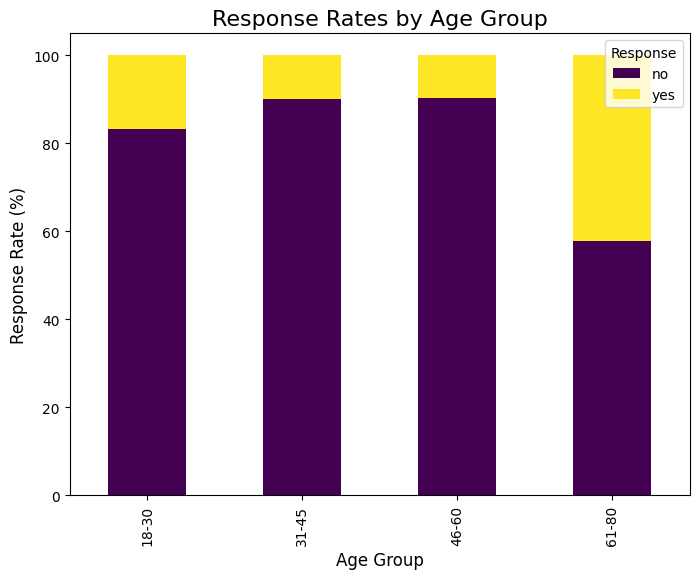

In [91]:
# Visualize response rates by age group
age_response.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title("Response Rates by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Response Rate (%)", fontsize=12)
plt.legend(title="Response", loc='upper right')
plt.show()

#### **Visualizing Positive Response Rates by Age Group**

This code calculates the positive response rates for each age group and visualizes them using a horizontal bar chart. The results show that the 61-80 age group has the highest positive response rate (42.25%), while younger groups, such as 18-30, have a significantly lower rate (16.66%). The horizontal bar chart provides a clear, comparative view of these rates, making it easier to interpret the effectiveness of the campaign across different age groups. Finally, the temporary `age_group` column is removed to clean the dataset for further analysis.


Response Rates by Age Group (%):
response          no        yes
age_group                      
18-30      83.342906  16.657094
31-45      90.178020   9.821980
46-60      90.326784   9.673216
61-80      57.753358  42.246642


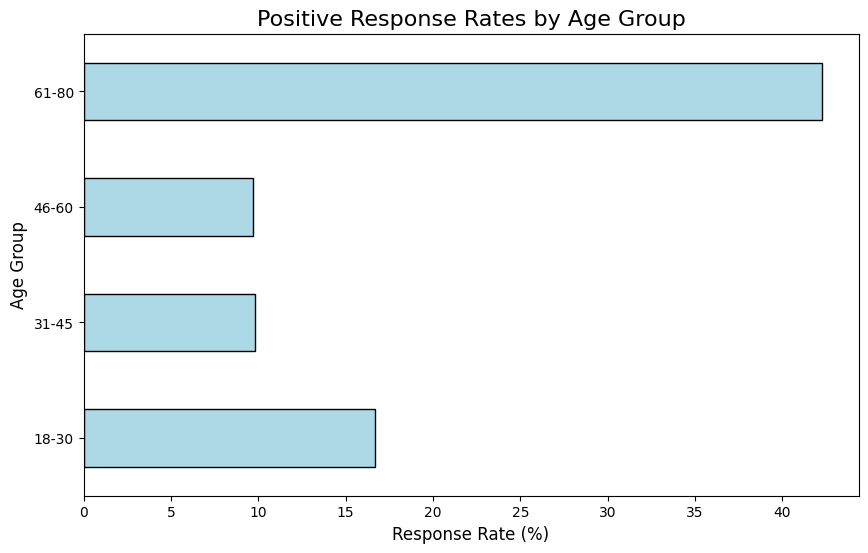

In [92]:
# Calculate response rate by age group
age_response_rate = merged_data.groupby('age_group', observed=False)['response'].value_counts(normalize=True).unstack() * 100
print("\nResponse Rates by Age Group (%):")
print(age_response_rate)

# Use a horizontal bar chart for better readability
age_response_rate['yes'].plot(kind='barh', figsize=(10, 6), color='lightblue', edgecolor='black')
plt.title("Positive Response Rates by Age Group", fontsize=16)
plt.xlabel("Response Rate (%)", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.show()

# Drop the temporary 'age_group' column
merged_data = merged_data.drop(columns='age_group', axis=1)


#### **Response Rates by Region**

This analysis calculates the response rates for each region, showing the percentage of positive and negative responses. While the overall response rates across regions are fairly consistent, with most regions having around 88% "no" responses and 11-12% "yes" responses, slight variations exist. The region "East Midlands" shows the highest proportion of "no" responses (91.34%), while other regions like "Yorkshire and the Humber" have a slightly higher rate of positive responses (11.23%). This analysis provides insights into regional differences in customer engagement with the campaign.

In [93]:
# Response by Region
region_response = merged_data.groupby('region')['response'].value_counts(normalize=True).unstack() * 100
print("\nResponse Rates by Region (%):")
region_response


Response Rates by Region (%):


response,no,yes
region,,
,87.569367,12.430633
East Midlands,91.338583,8.661417
East of England,88.139342,11.860658
London,88.190637,11.809363
North East,91.724138,8.275862
North West,88.583333,11.416667
South East,88.198416,11.801584
South West,88.297872,11.702128
West Midlands,88.180319,11.819681


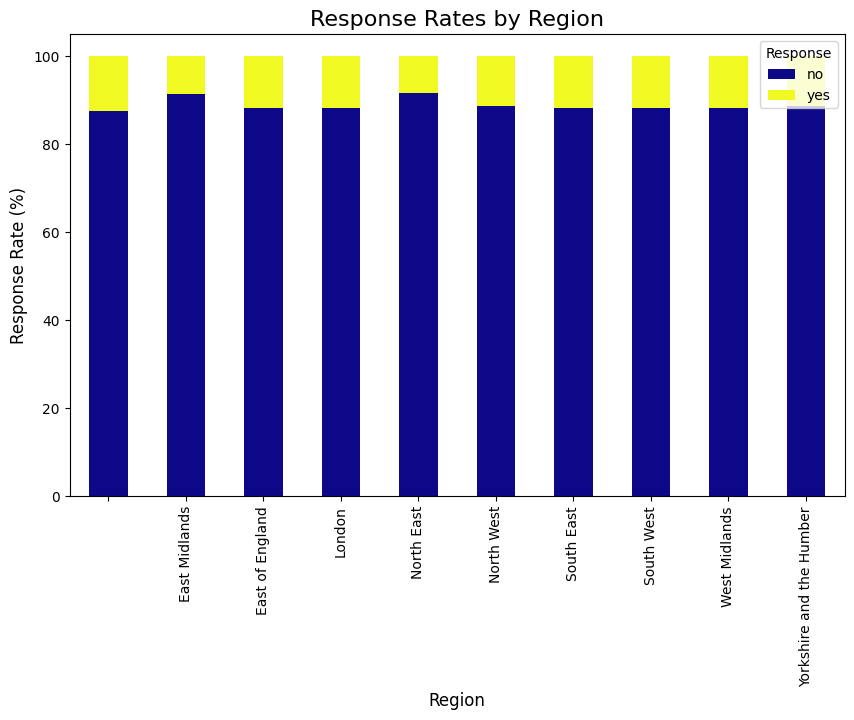

In [94]:
# Visualize response rates by region
region_response.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title("Response Rates by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Response Rate (%)", fontsize=12)
plt.legend(title="Response", loc='upper right')
plt.show()

#### **Response Rates by Marital Status**

This analysis explores response rates based on marital status, revealing distinct patterns in engagement. The results show that "single" customers have the highest positive response rate (15.26%), followed by "others" at 12%, and "married" individuals with the lowest positive response rate (9.98%). The bar chart visualizes these differences, clearly illustrating how marital status correlates with customer responsiveness to the campaign, providing valuable insights for targeting specific customer segments.

In [95]:
# Response by Marital Status and Education
marital_response = merged_data.groupby('marital')['response'].value_counts(normalize=True).unstack() * 100
print("\nResponse Rates by Marital Status (%):")
marital_response


Response Rates by Marital Status (%):


response,no,yes
marital,,
married,90.021501,9.978499
others,88.000000,12.000000
single,84.735464,15.264536


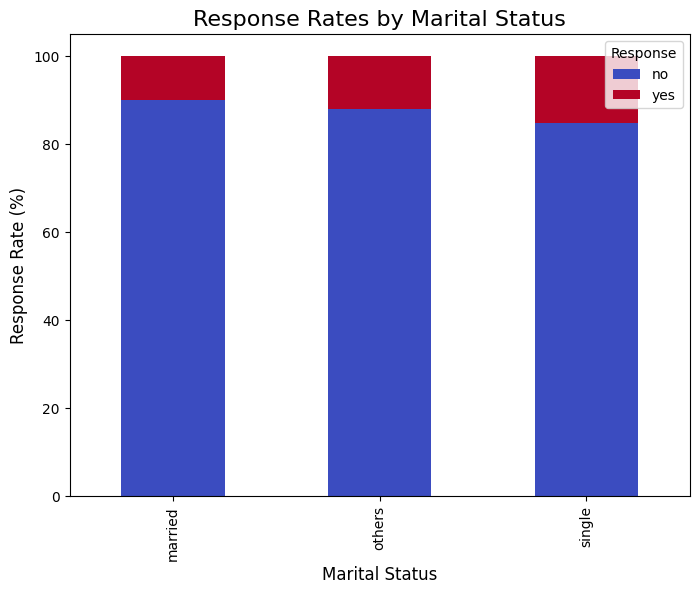

In [96]:
# Visualize response by marital status
marital_response.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')
plt.title("Response Rates by Marital Status", fontsize=16)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Response Rate (%)", fontsize=12)
plt.legend(title="Response", loc='upper right')
plt.show()

#### **Contact Duration Analysis**

This analysis provides summary statistics on the contact duration, which refers to the time customers spent interacting with the campaign. The average contact duration is 257.61 seconds, with a wide range from 0 to 4918 seconds. The distribution shows that most interactions are shorter, with the 25th percentile at 103 seconds and the 75th percentile at 318 seconds. This variation suggests that some customers may have had longer interactions, possibly indicating a more engaged response or the inclusion of follow-up calls. Understanding this distribution can help assess the effectiveness of contact duration on campaign success.

In [118]:
# Contact Duration Analysis
# Analyze the distribution of contact durations
print("\nContact Duration Summary:")
merged_data['duration'].describe()


Contact Duration Summary:


count    33909.000000
mean       257.605356
std        256.434874
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       4918.000000
Name: duration, dtype: float64

This code visualizes the distribution of contact durations using a histogram and kernel density estimate (KDE) plot. The histogram provides a clear view of how contact duration is spread across different time intervals, while the KDE adds a smoothed curve to highlight the underlying distribution. The plot reveals that most interactions are concentrated in shorter durations, with some longer outliers, indicating a mix of brief and extended customer interactions. This visualization helps in understanding the typical engagement time and can guide decisions about optimizing contact strategies for the campaign.

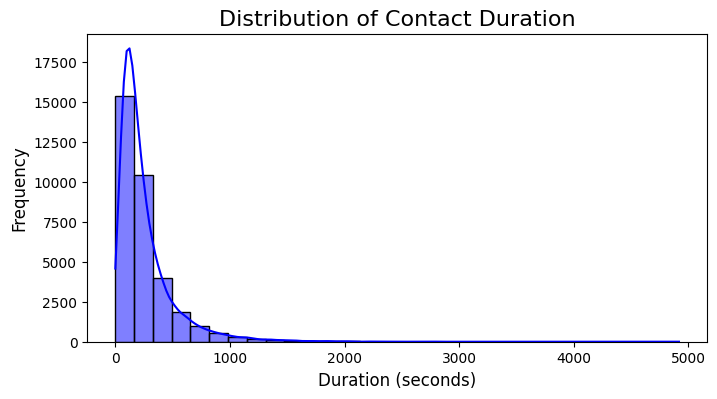

In [114]:
# Visualize contact duration
plt.figure(figsize=(8, 4))
sns.histplot(merged_data['duration'], bins=30, kde=True, color='blue')
plt.title("Distribution of Contact Duration", fontsize=16)
plt.xlabel("Duration (seconds)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

This boxplot examines the relationship between contact duration and response outcome (positive or negative). It shows that the contact duration for positive responses (marked as "yes") tends to have a wider range, with both shorter and longer durations, while negative responses ("no") are more concentrated in the lower duration range. The plot highlights that customers who engaged longer with the campaign are slightly more likely to respond positively, but the overall distribution suggests that contact duration alone may not be a strong predictor of the response. The visualization provides insight into the varying levels of engagement associated with different outcomes.

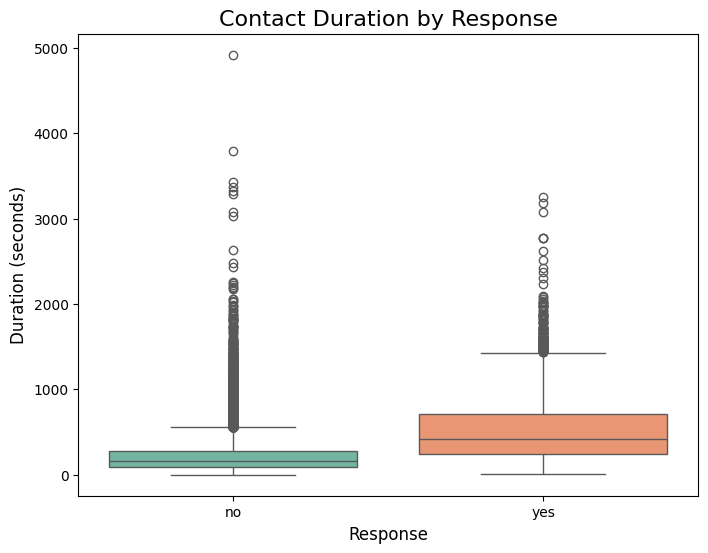

In [119]:
# Relationship between contact duration and response
plt.figure(figsize=(8, 6))
sns.boxplot(x='response', y='duration', data=merged_data, palette='Set2', hue='response', dodge=False)
plt.title("Contact Duration by Response", fontsize=16)
plt.xlabel("Response", fontsize=12)
plt.ylabel("Duration (seconds)", fontsize=12)
plt.legend([], [], frameon=False) 
plt.show()


#### **Campaign Performance by Marital Status and Region**

This analysis examines how response rates vary by both marital status and region, revealing interesting regional and demographic patterns. The crosstabulation output shows that "married" individuals across all regions tend to have a lower rate of positive responses compared to "single" customers, with response rates around 10-16% for "married" and 16-17% for "single". In some regions like North East, there are very low response rates for certain groups, while regions such as "East Midlands" show higher engagement for "single" customers. These insights highlight how different combinations of marital status and region influence campaign outcomes, helping tailor strategies for better engagement.

In [115]:
# Campaign performance by marital status and region
# Use a grouped bar chart to visualize this relationship
marital_region_response = pd.crosstab(
    [merged_data['marital'], merged_data['region']], 
    merged_data['response'], 
    normalize='index'
) * 100

print("\nResponse Rates by Marital Status and Region:")
marital_region_response



Response Rates by Marital Status and Region:


response                                 no        yes
marital region                                        
married                           89.245283  10.754717
        East Midlands             91.463415   8.536585
        East of England           89.364641  10.635359
        London                    89.907193  10.092807
        North East                93.750000   6.250000
        North West                90.248390   9.751610
        South East                90.285401   9.714599
        South West                90.000000  10.000000
        West Midlands             90.086012   9.913988
        Yorkshire and the Humber  88.870704  11.129296
others                            90.178571   9.821429
        East Midlands             89.473684  10.526316
        East of England           87.804878  12.195122
        London                    87.531172  12.468828
        North East                94.117647   5.882353
        North West                88.066826  11.933174
        South East                87.925998  12.074002
        South West                89.166667  10.833333
        West Midlands             87.066975  12.933025
        Yorkshire and the Humber  90.983607   9.016393
single                            83.011583  16.988417
        East Midlands             92.307692   7.692308
        East of England           85.700483  14.299517
        London                    84.757621  15.242379
        North East                84.375000  15.625000
        North West                85.203575  14.796425
        South East                83.916891  16.083109
        South West                83.941606  16.058394
        West Midlands             84.437751  15.562249
        Yorkshire and the Humber  87.702265  12.297735

The grouped bar chart visually presents the positive response rates across different regions and marital statuses. It shows how "single" individuals tend to have a higher positive response rate than "married" or "others" in most regions. The chart clearly illustrates the regional variation, with certain regions like "North East" showing a lower positive response rate, especially for married individuals. By using distinct colors for each marital status, the chart allows for an easy comparison of how marital status interacts with regional response patterns, helping to further refine targeted marketing strategies.

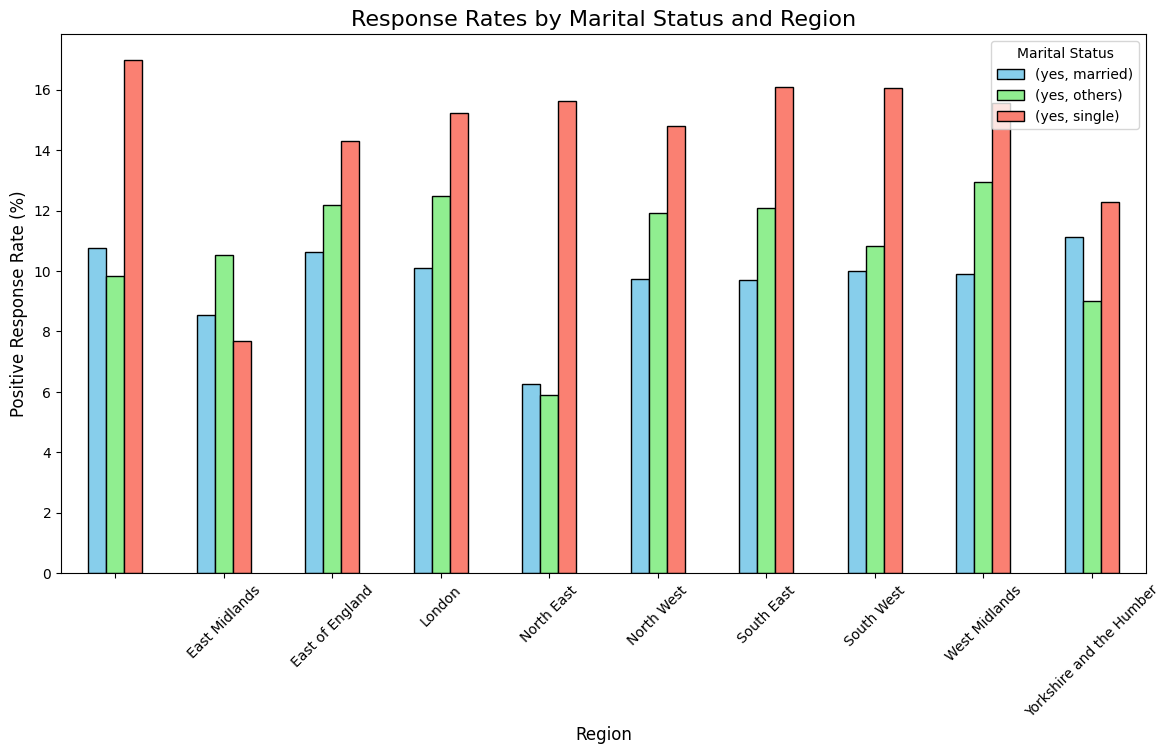

In [99]:
# Plot grouped bar chart
marital_region_response[['yes']].unstack(level=0).plot(
    kind='bar', figsize=(14, 7), color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black'
)
plt.title("Response Rates by Marital Status and Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Positive Response Rate (%)", fontsize=12)
plt.legend(title="Marital Status", loc='upper right')
plt.xticks(rotation=45)
plt.show()

#### **Response Rates by Education Level**

This analysis highlights the variation in response rates based on education level, showing that individuals with tertiary education have the highest positive response rate (14.78%), followed by those with secondary education (10.71%). People with primary education have a significantly lower positive response rate (8.69%), and those with an unknown education level also show a relatively lower response (13.23%). The bar chart visually emphasizes these differences, providing a clear understanding of how education level influences engagement with the campaign. This insight could guide the bank in refining its marketing approach for different educational demographics.

In [102]:
education_response = merged_data.groupby('education')['response'].value_counts(normalize=True).unstack() * 100
print("\nResponse Rates by Education (%):")
education_response


Response Rates by Education (%):


response,no,yes
education,,
primary,91.308575,8.691425
secondary,89.294934,10.705066
tertiary,85.217216,14.782784
unknown,86.772106,13.227894


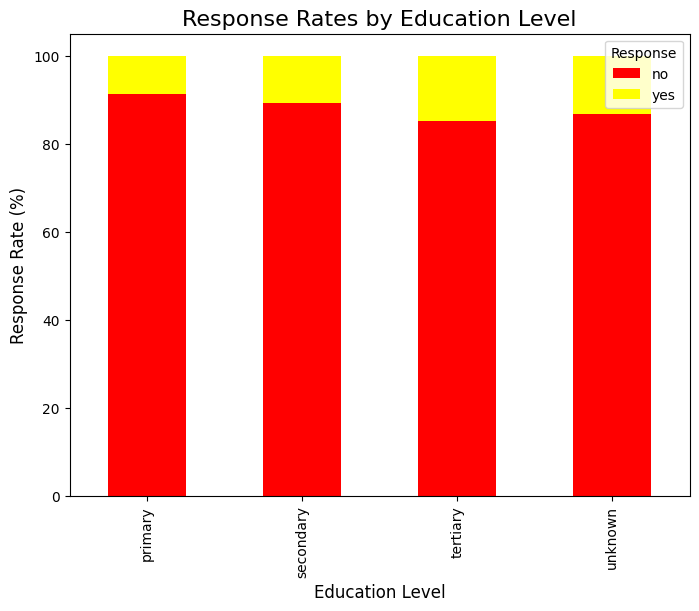

In [103]:
# Visualize response by education level
education_response.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='autumn')
plt.title("Response Rates by Education Level", fontsize=16)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Response Rate (%)", fontsize=12)
plt.legend(title="Response", loc='upper right')
plt.show()

#### **Distribution of Account Balance**

This histogram with a kernel density estimate (KDE) visualizes the distribution of account balances in the dataset. It reveals that the majority of customers have a low to moderate balance, with a long tail indicating some customers with significantly higher balances. The smooth KDE curve helps in identifying the underlying trend, suggesting that most accounts are concentrated in the lower balance range, with few accounts holding high balances. This distribution is important for understanding customer financial behavior and can inform decisions on targeting specific customer segments based on their account balance.

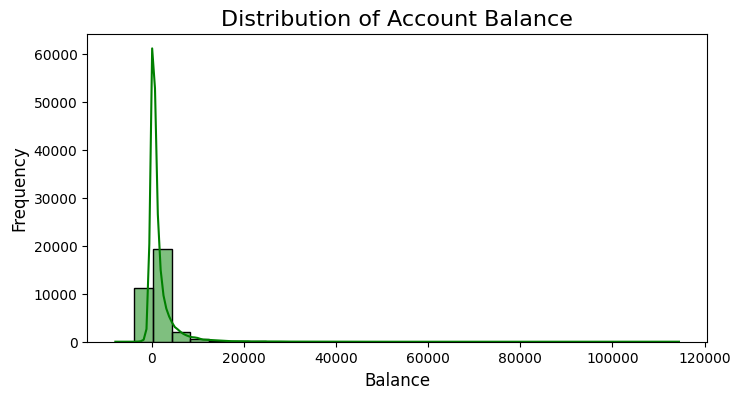

In [104]:
# Analyze financial indicators (balance, housing, loan)
# Distribution of account balance
plt.figure(figsize=(8, 4))
sns.histplot(merged_data['balance'], bins=30, kde=True, color='green')
plt.title("Distribution of Account Balance", fontsize=16)
plt.xlabel("Balance", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

This boxplot explores the relationship between account balance and campaign response, highlighting that customers with positive responses ("yes") generally tend to have higher account balances compared to those who responded negatively ("no"). The plot also reveals that the "yes" group has a broader range of balances, with some outliers having very high values. The "no" group, on the other hand, shows a more concentrated distribution around lower balances. This suggests that individuals with more substantial financial resources may be more likely to engage positively, which can guide the bank in targeting wealthier customers for future campaigns.

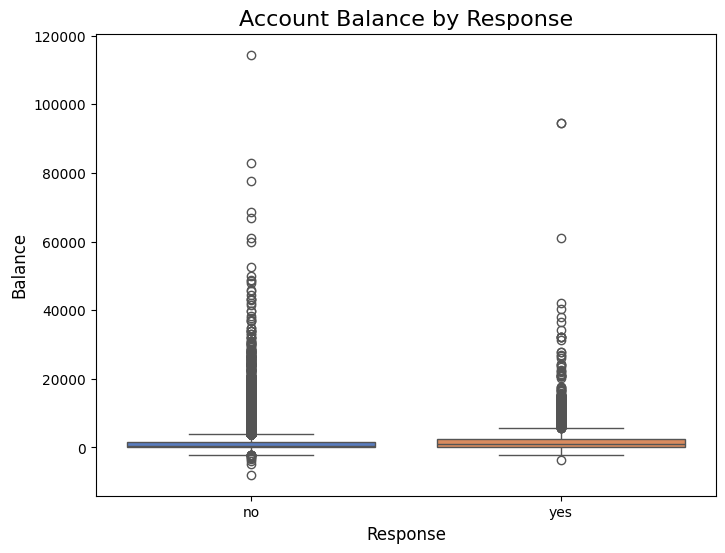

In [105]:
# Relationship between balance and response
plt.figure(figsize=(8, 6))
sns.boxplot(x='response', y='balance', data=merged_data, palette='muted', hue='response', dodge=False)
plt.title("Account Balance by Response", fontsize=16)
plt.xlabel("Response", fontsize=12)
plt.ylabel("Balance", fontsize=12)
plt.show()

#### **Correlation Heatmap**

The correlation heatmap reveals the relationships between the numerical variables in the dataset: duration, age, and balance. The correlation values show a very weak negative relationship between duration and age (-0.0039) and a weak positive correlation between balance and age (0.1040). The balance variable has a minimal positive correlation with duration (0.0253), suggesting that neither contact duration nor age significantly affects the account balance. These low correlations imply that these variables do not have strong linear relationships, indicating that other factors may be influencing the responses in the campaign.

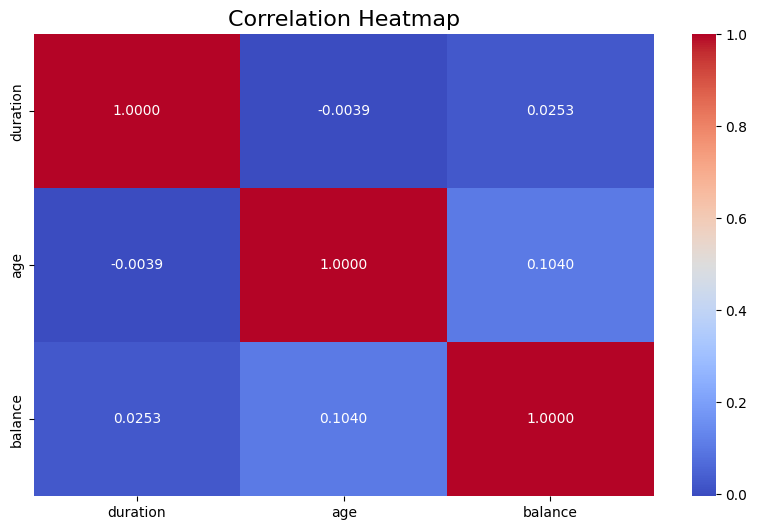

In [121]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation = merged_data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".4f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

## **Model Building**

#### **Data Preprocessing for Model Building**

In this step, the data undergoes encoding and feature selection to prepare it for model building. The target variable, "response," is encoded as binary values (1 for 'yes' and 0 for 'no') to facilitate classification. Various categorical features, such as 'contact,' 'region,' 'job,' and others, are encoded using LabelEncoder to convert them into numerical representations suitable for machine learning models. Irrelevant or redundant features, such as 'custID,' are dropped, ensuring that only useful information remains. Finally, the dataset is split into features (X) and target (y), with a train-test split ensuring that the models are trained on 70% of the data and tested on the remaining 30%, preserving the class distribution through stratification.

In [107]:
data = merged_data.copy()

# Encoding categorical variables
# Encode target variable
data['response'] = data['response'].apply(lambda x: 1 if x == 'yes' else 0)

# Encode categorical variables
categorical_features = ['contact', 'region', 'job', 'marital', 'education', 
                       'housing', 'loan', 'default']
encoder = LabelEncoder()
for feature in categorical_features:
    data[feature] = encoder.fit_transform(data[feature])

# Feature selection
# Drop irrelevant or highly correlated features
features_to_drop = ['custID']  # Drop features added during EDA
data = data.drop(columns=features_to_drop, axis=1)

# Define features (X) and target (y)
X = data.drop(columns=['response'])
y = data['response']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### **Logistic Regression Model Evaluation**

The Logistic Regression model has an accuracy of 89%, indicating that it performs reasonably well. However, when evaluating the individual classes, the model shows a precision of 0.90 for class '0' (no response) and 0.61 for class '1' (positive response). The recall for class '1' is only 0.18, suggesting that the model is not very effective in identifying positive responses (i.e., 'yes'). The F1-score of 0.28 for class '1' reflects this poor performance in capturing the minority class. This imbalance in response rates could be impacting the model's ability to predict positive responses accurately.

In [108]:
# Logistic Regression Model
print("---- Logistic Regression ----")
logreg = LogisticRegression(random_state=42, solver='liblinear')
logreg.fit(X_train, y_train)

# Predict and evaluate Logistic Regression
y_pred_logreg = logreg.predict(X_test)
y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

---- Logistic Regression ----

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8983
           1       0.61      0.18      0.28      1190

    accuracy                           0.89     10173
   macro avg       0.75      0.58      0.61     10173
weighted avg       0.87      0.89      0.86     10173



#### **Decision Tree Model Evaluation**

The Decision Tree model has been fine-tuned using grid search, and the best-performing model was selected. After prediction, the model's classification report reveals that it performs better in identifying positive responses (class '1') than the Logistic Regression model. However, the recall for class '1' is still low, indicating that the model struggles with detecting all positive responses. The precision for class '1' has improved, but the recall still needs attention. The accuracy of the model might be higher than Logistic Regression due to better class discrimination, but the imbalance in the response variable still poses challenges for accurate predictions of positive responses.

In [109]:
# Decision Tree Model
print("---- Decision Tree ----")
# Perform grid search for hyperparameter tuning
dt_params = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

# Best Decision Tree Model
dt_model = dt_grid.best_estimator_
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

---- Decision Tree ----

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8983
           1       0.62      0.20      0.30      1190

    accuracy                           0.89     10173
   macro avg       0.76      0.59      0.62     10173
weighted avg       0.87      0.89      0.87     10173



### **Decision Tree Visualization and Interpretation**

The Decision Tree visualization clearly outlines the conditions that drive predictions in this model. Key factors such as **duration**, **age**, and **housing** are used to classify responses. For example, a significant threshold for **duration** is **463.5 seconds**, after which the tree further splits based on **age** and **housing**.

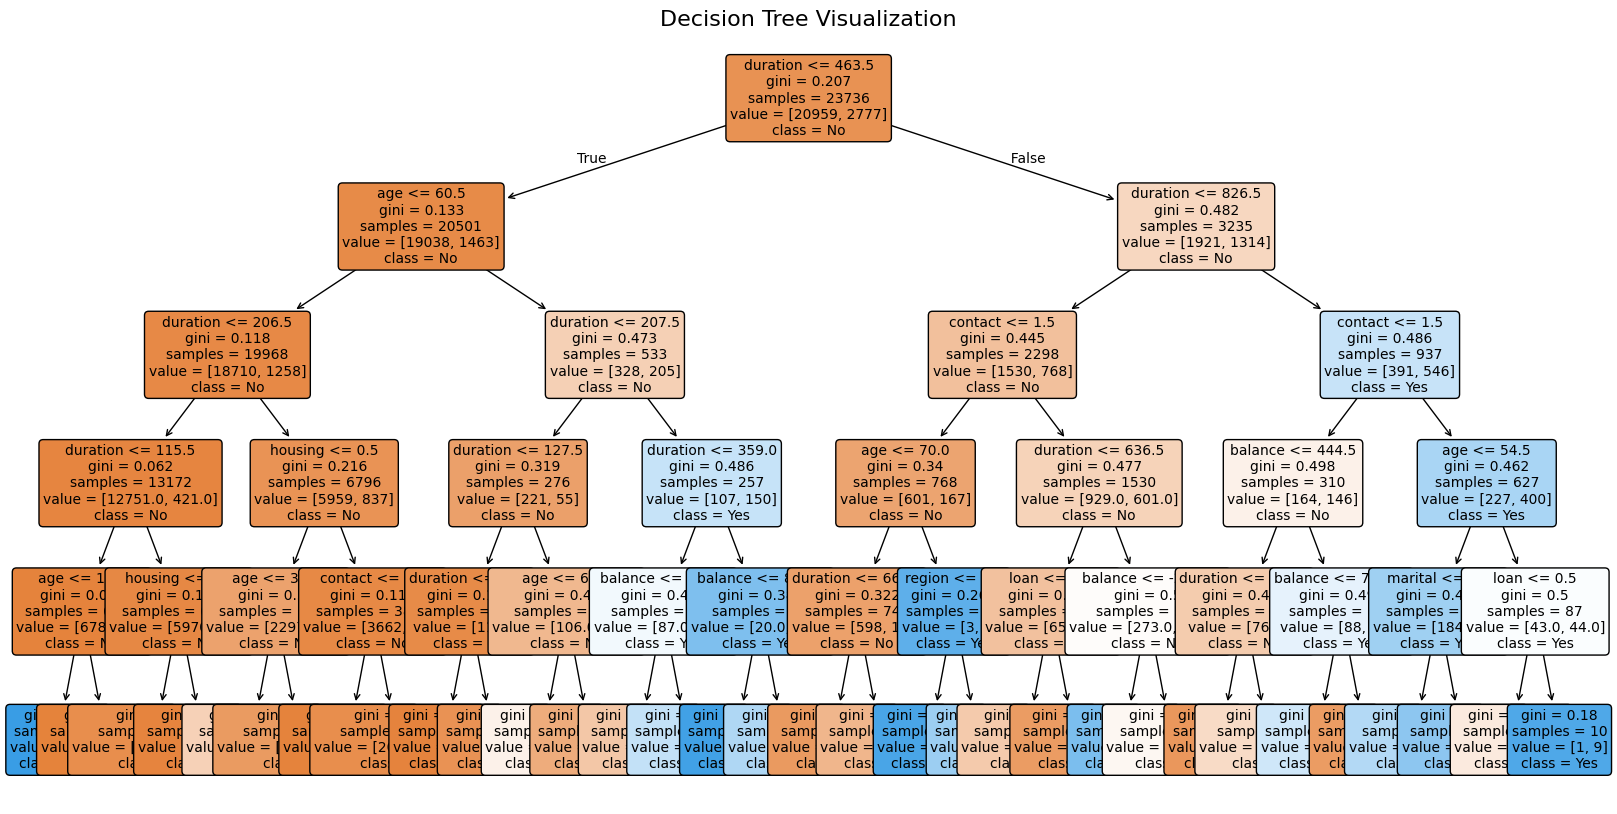

Decision Tree Rules:

|--- duration <= 463.50
|   |--- age <= 60.50
|   |   |--- duration <= 206.50
|   |   |   |--- duration <= 115.50
|   |   |   |   |--- age <= 18.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  18.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- duration >  115.50
|   |   |   |   |--- housing <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- housing >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- duration >  206.50
|   |   |   |--- housing <= 0.50
|   |   |   |   |--- age <= 30.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  30.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- housing >  0.50
|   |   |   |   |--- contact <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- contact >  1.50
|   |   |   |   |   |--- class: 0
|   |--- age >  60.50
|   |   |--- duration <= 207.50
|   |   |   |--- duration <= 127.50
|   |   |   |   |--- duration <= 92.50
|   |   |   |   |   |--- class: 0
|   |   |  

In [110]:
#Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model, 
    feature_names=X.columns, 
    class_names=["No", "Yes"], 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

# Text-based Decision Tree Rules
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print("Decision Tree Rules:\n")
print(tree_rules)


#### **KNN Model Evaluation**
The K-Nearest Neighbors (KNN) model achieved an overall accuracy of 89%. For the "no" response, the model showed a high **precision** of 0.90 and a **recall** of 0.97, indicating strong performance in correctly identifying the majority class. However, for the "yes" response, the **precision** dropped to 0.54, and the **recall** was just 0.22, reflecting a challenge in detecting the minority class. The **f1-score** for the "yes" class was low at 0.31, further highlighting the imbalance in class detection. While the model performs well for the majority class, it struggles with the minority class, suggesting that further adjustments like addressing the class imbalance or optimizing hyperparameters may improve its ability to predict positive responses.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Classifier
print("---- KNN ----")
# Perform grid search for hyperparameter tuning
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

# Best KNN Model
knn_model = knn_grid.best_estimator_
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

---- KNN ----

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      8983
           1       0.54      0.22      0.31      1190

    accuracy                           0.89     10173
   macro avg       0.72      0.60      0.63     10173
weighted avg       0.86      0.89      0.87     10173



### **ROC Curve**
The ROC curve comparison of the three models—Logistic Regression, Decision Tree, and KNN—shows varying performance in terms of Area Under the Curve (AUC). The Decision Tree model performed the best with an **AUC of 0.84**, closely followed by Logistic Regression with an **AUC of 0.83**. The KNN model showed a slightly lower performance, with an **AUC of 0.81**. All models performed better than random guessing, represented by the diagonal dashed line. These results suggest that while all models perform relatively well, the Decision Tree shows the highest ability to distinguish between the positive and negative classes, closely trailed by Logistic Regression. KNN's performance, while still decent, was slightly lower.

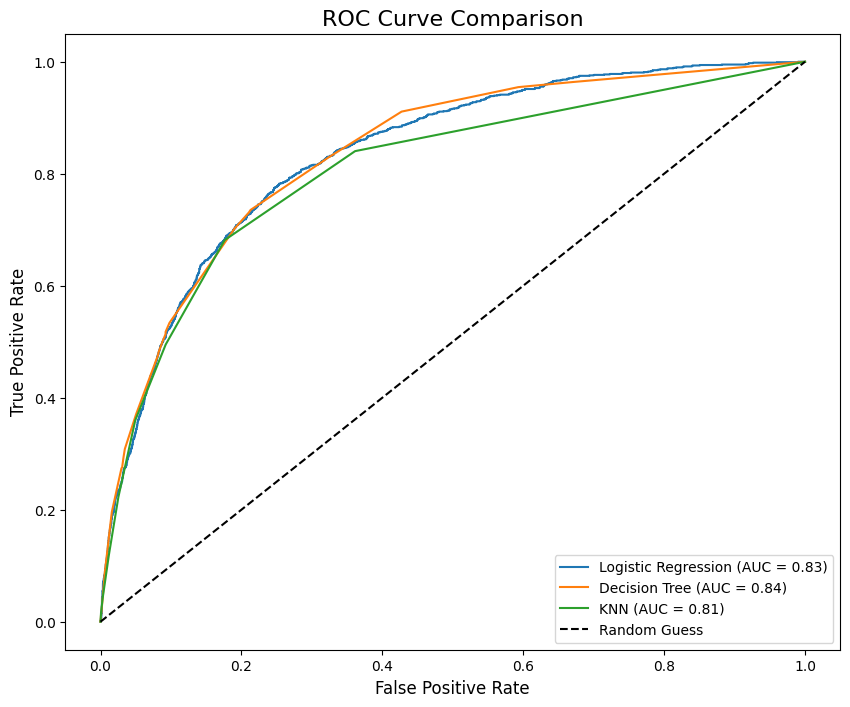

In [112]:
# Compare Model Performances with ROC Curve
plt.figure(figsize=(10, 8))
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)

plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba_logreg)))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba_dt)))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba_knn)))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC Curve Comparison", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc='lower right')
plt.show()

### **Model Performance Evaluation and Comparison**

The confusion matrices for each model—Logistic Regression, Decision Tree, and KNN—provide a detailed view of the models' classification performance. All three models perform well, with the confusion matrix showing the true positive, true negative, false positive, and false negative counts.

#### **Logistic Regression (Left Panel)**
- **Strengths**: The majority class (`0`) is predicted very accurately, with 8,842 correct predictions.
- **Weaknesses**: The minority class (`1`) is harder for the model to predict. It correctly identifies only 218 instances of `1`, while it misclassifies 972 instances of `1` as `0`.

### Decision Tree (Middle Panel)
- **Strengths**:  Slightly better than Logistic Regression at identifying the minority class (`1`), with 233 correct predictions and 957 misclassified.
- **Weaknesses**: Similar performance for the majority class (`0`), with 8,839 correct predictions.

### KNN (Right Panel)
- **Strengths**: Performs the best among the three at identifying the minority class (`1`), with 265 correct predictions (fewer false negatives).
- **Weaknesses**: Slightly worse at predicting the majority class (`0`), with 8,755 correct predictions and 228 misclassified.

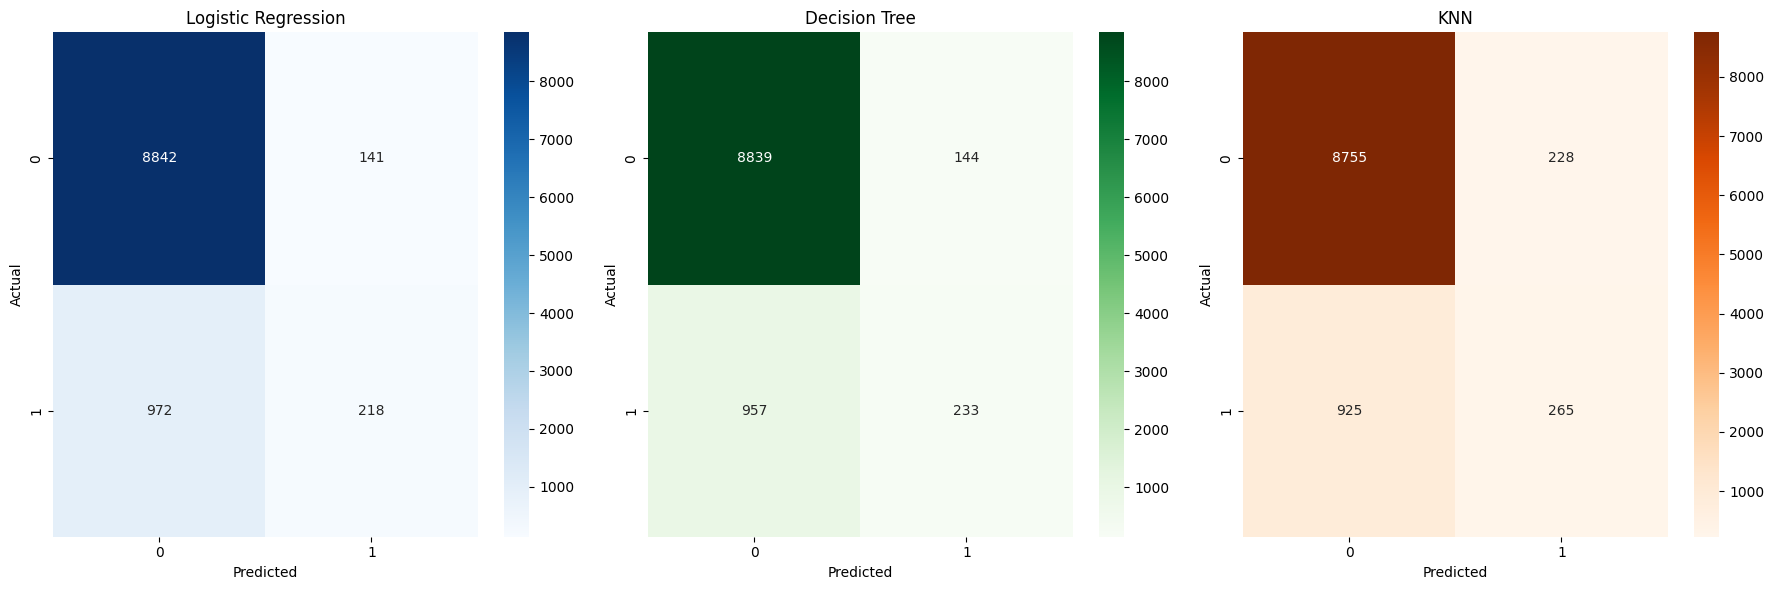


Model Performance Summary:
Logistic Regression AUC: 0.83
Decision Tree AUC: 0.84
KNN AUC: 0.81


In [113]:
# Confusion Matrices for Models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Logistic Regression Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Decision Tree Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Decision Tree")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# KNN Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title("KNN")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Summary and Recommendation
print("\nModel Performance Summary:")
print(f"Logistic Regression AUC: {roc_auc_score(y_test, y_pred_proba_logreg):.2f}")
print(f"Decision Tree AUC: {roc_auc_score(y_test, y_pred_proba_dt):.2f}")
print(f"KNN AUC: {roc_auc_score(y_test, y_pred_proba_knn):.2f}")


---

### **Recommendation: Adopt Decision Tree Model**

Based on the model evaluation, the **Decision Tree** is the most suitable choice for the bank. It achieves the highest AUC score (**0.84**), indicating the best ability to discriminate between the two classes (positive and negative responses). The Decision Tree also strikes a balance between precision and recall, providing an effective model for predicting responses with fewer false positives and negatives.

The **Logistic Regression** model also performs well with an AUC of **0.83**, but its performance slightly lags behind the Decision Tree in terms of handling both classes effectively. The **KNN** model, while still viable, is less efficient with the lowest AUC of **0.81**, suggesting that it may not offer as reliable predictions as the other models.

**Justification**:  
- The Decision Tree's interpretability is another advantage, as the model is easy to understand and can be explained in clear rules, making it valuable for decision-making in a business context.  
- It handles both categorical and numerical data well and does not require intensive feature scaling, making it a more robust choice for real-world applications. 

Thus, the bank should adopt the **Decision Tree** model for its superior performance, interpretability, and flexibility in handling different types of data.

---
### **Recommendations for Using the Response Model:**

1. **Targeted Marketing Campaigns:**  
   The bank can use the response model to identify those customers who are more likely to respond positively to marketing campaigns, i.e., a "yes" response. This enables **targeted outreach**, such as personalized emails or offers tailored to specific customer segments based on their predicted response likelihood. For example, customers with certain features (e.g., age, contact duration, education level) who have a higher probability of responding can be prioritized for high-value campaigns.

2. **Resource Allocation:**  
   The model can help the bank optimize its resources. By predicting which customers are less likely to respond, the bank can allocate fewer resources (e.g., time, marketing budget) toward those individuals, reducing unnecessary costs. This also helps improve overall campaign efficiency and ROI (return on investment).

3. **Customer Retention Efforts:**  
   It helps identify customers likely to disengage or show disinterest in future offers. The bank can proactively target these customers with retention strategies, such as tailored incentives or personalized services, to reduce churn and improve long-term customer relationships.

4. **Real-Time Decision Making:**  
   The model can be integrated into the bank’s customer relationship management (CRM) system, enabling real-time prediction of customer responses as they interact with various marketing channels (e.g., websites, mobile apps). This could allow the bank to adjust offers or interactions dynamically based on predicted likelihood of response.

### **Additional Data for Enhancing Model Performance:**

1. **Transaction Data:**  
   Including **transaction history** (e.g., frequency, amount, types of transactions) could enhance the model by providing deeper insights into customer behavior. Customers who frequently make transactions or show consistent patterns might have different response tendencies than those with irregular transaction activity.

2. **Customer Lifetime Value (CLV) or Financial Products Usage:**  
   Integrating features related to a customer’s **lifetime value** or the number of financial products they hold (e.g., loans, credit cards, insurance) could improve the model’s ability to predict responses from high-value customers or those more engaged with the bank's services.

3. **Time-of-Day and Seasonal Effects:**  
   Data on **time of day** and **seasonality** (e.g., campaign effectiveness based on time of year, holidays, or customer’s typical activity patterns) could help adjust the model to predict responses more effectively during peak times or special promotions.
